In [3]:
#About Dataset
#Machine Predictive Maintenance Classification Dataset
#Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

#The dataset consists of 10 000 data points stored as rows with 14 features in columns

#UID: unique identifier ranging from 1 to 10000
#productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
#air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
#process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
#rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
#torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
#tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
#'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
#Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
#Target : Failure or Not
#Failure Type : Type of Failure

# Importing Libraries

In [4]:
# Importing libraries
import pandas as pd 
import numpy as np

# Importing libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Setting up theme for data visualization in seaborn 
sns.set_theme(palette='tab10', font='Times New Roman', font_scale=1.5, rc=None) 

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

#Setting dark background for plots
plt.style.use('dark_background')

# Reading Data

In [6]:
# Reading CSV file stored in DB
df = pd.read_csv("machininfo.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Exploratory Data Analysis

### Converting Temperature from Kelvin to Celsius

In [31]:
# Temperature Conversion
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming the existing columns
df.rename(columns={"Air temperature [K]": "Air temperature [°C]", "Process temperature [K]": "Process temperature [°C]"}, inplace=True)
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df

KeyError: 'Air temperature [K]'

### Histograms of general data trends

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [°C]'}>,
        <Axes: title={'center': 'Process temperature [°C]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': 'Temperature difference [°C]'}>,
        <Axes: >]], dtype=object)

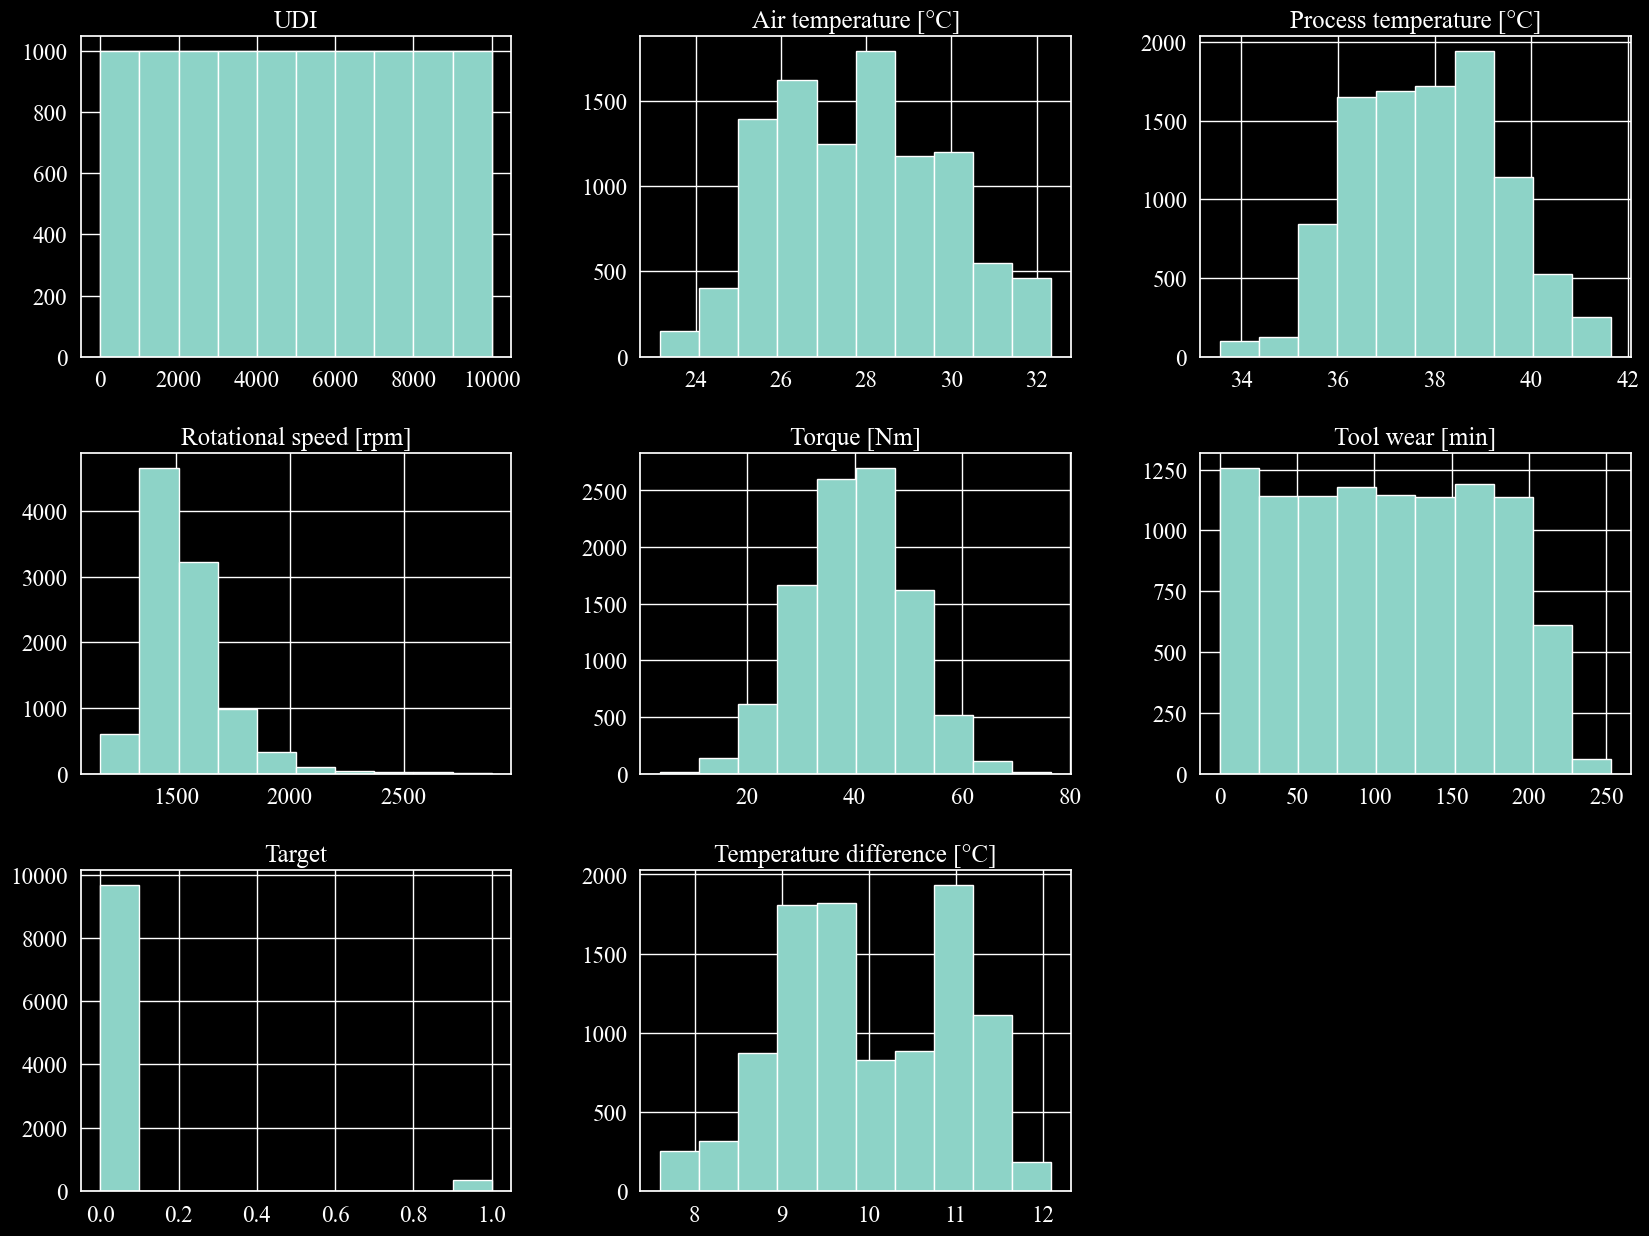

In [ ]:
# Showing trends in all columns
df.hist(figsize=(20,15))

### Understanding Data Distribution (Temperatures) with Seaborn library

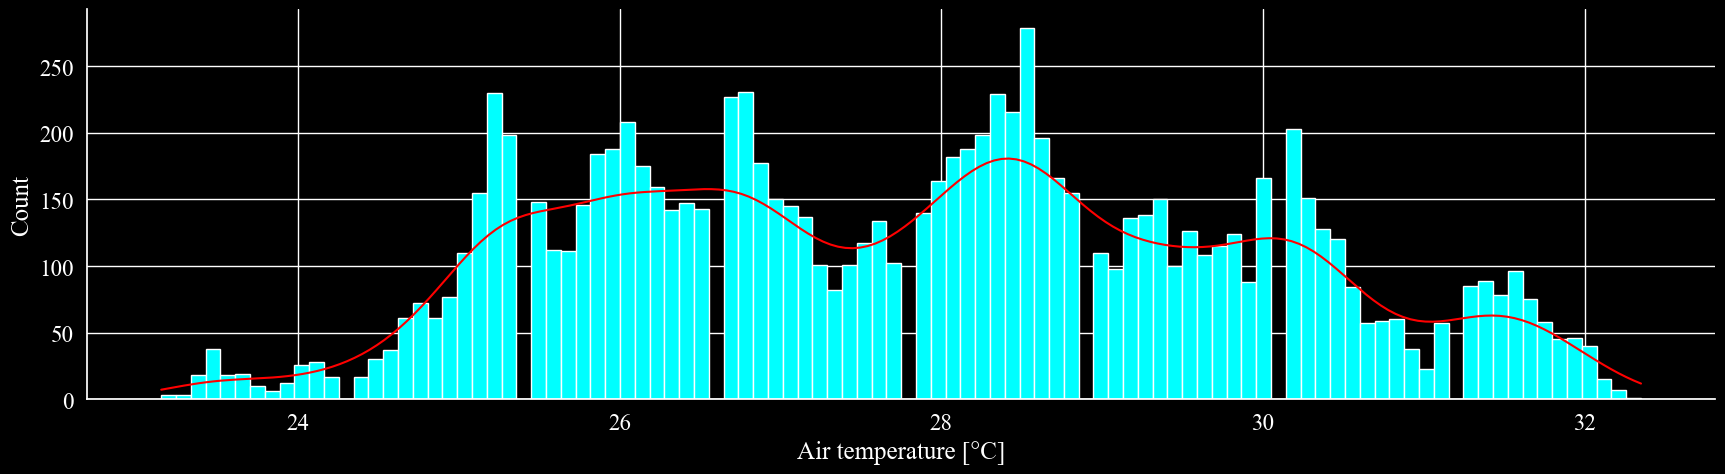

In [ ]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins=100, color="red", facecolor="cyan", height=5, aspect=3.5)

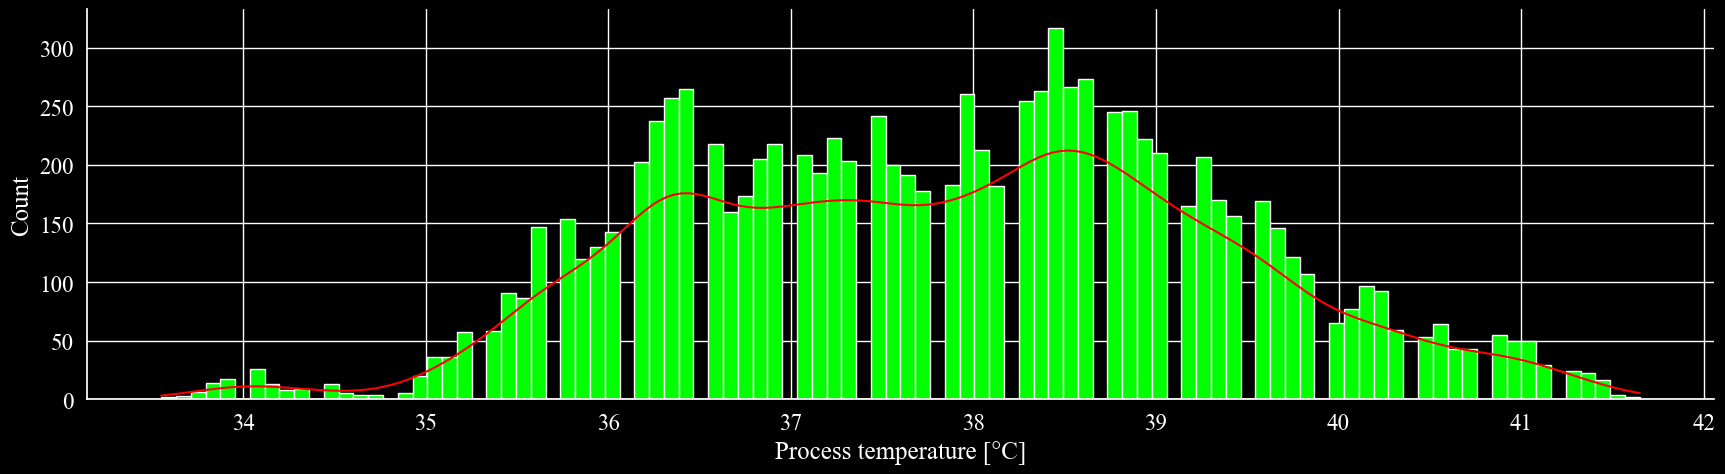

In [ ]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5)

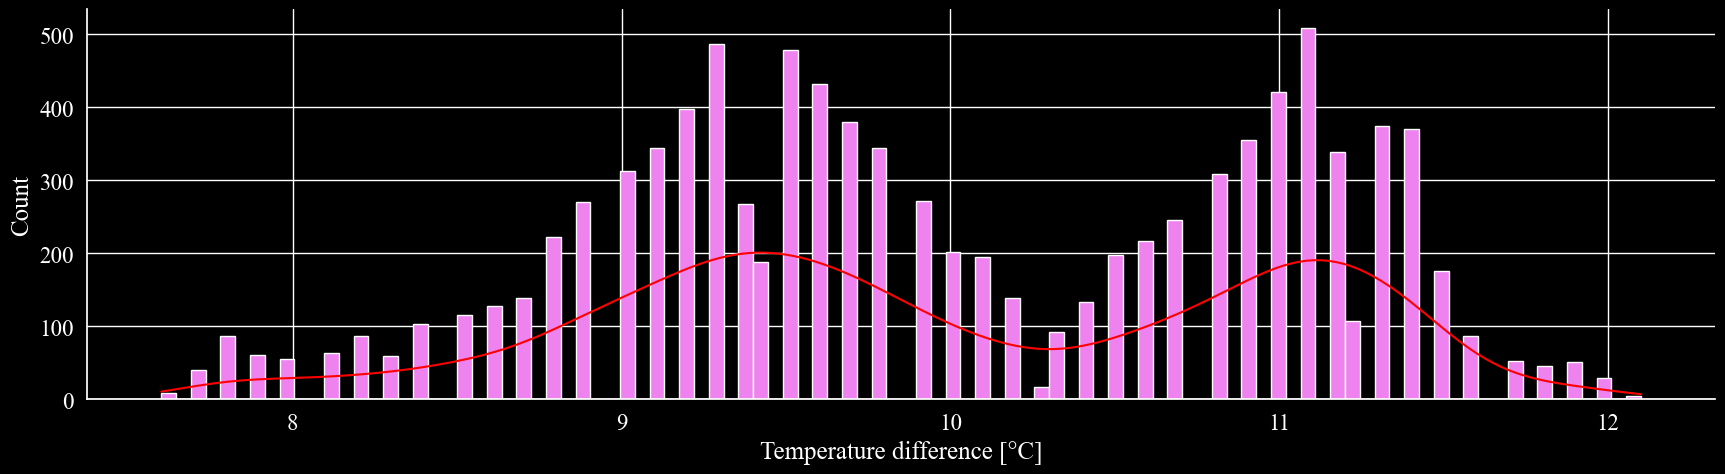

In [ ]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "red", facecolor = "violet",height = 5, aspect = 3.5)

### Piecharts

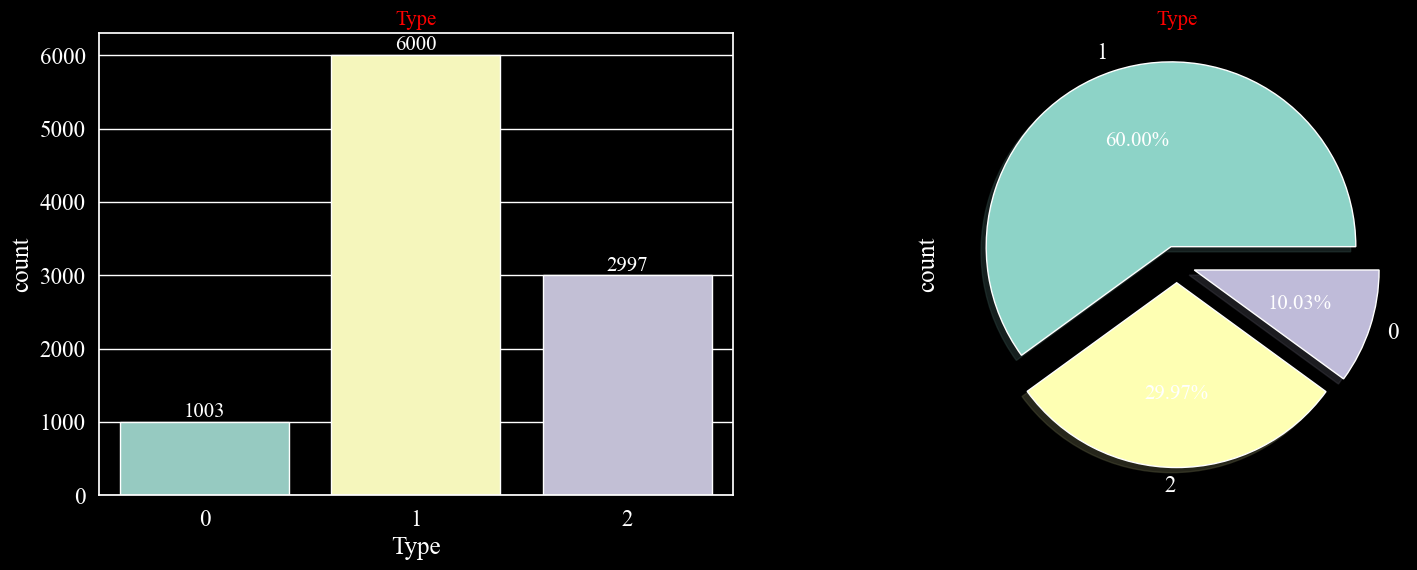

In [32]:
# Sorting machine quality types (Low, Medium, High)
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Type', data=df)
plt.bar_label(plt.gca().containers[0]) 
plt.title("Type", fontsize=20, color='Red', font='Times New Roman')

plt.subplot(1, 2, 2)
df['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
plt.title("Type", fontsize=20, color='Red', font='Times New Roman')

plt.show()

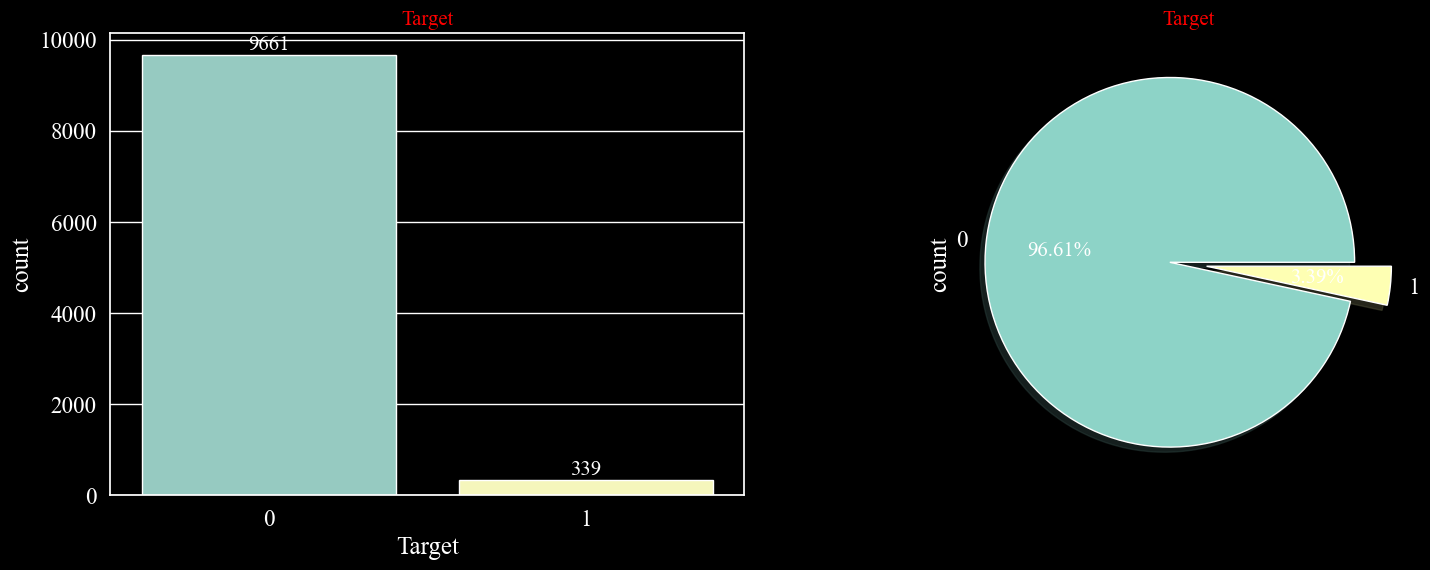

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Target', data=df)
plt.bar_label(plt.gca().containers[0]) 
plt.title("Target", fontsize=20, color='Red', font='Times New Roman')

plt.subplot(1, 2, 2)
df['Target'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
plt.title("Target", fontsize=20, color='Red', font='Times New Roman')

plt.show()

### Scatter Plots

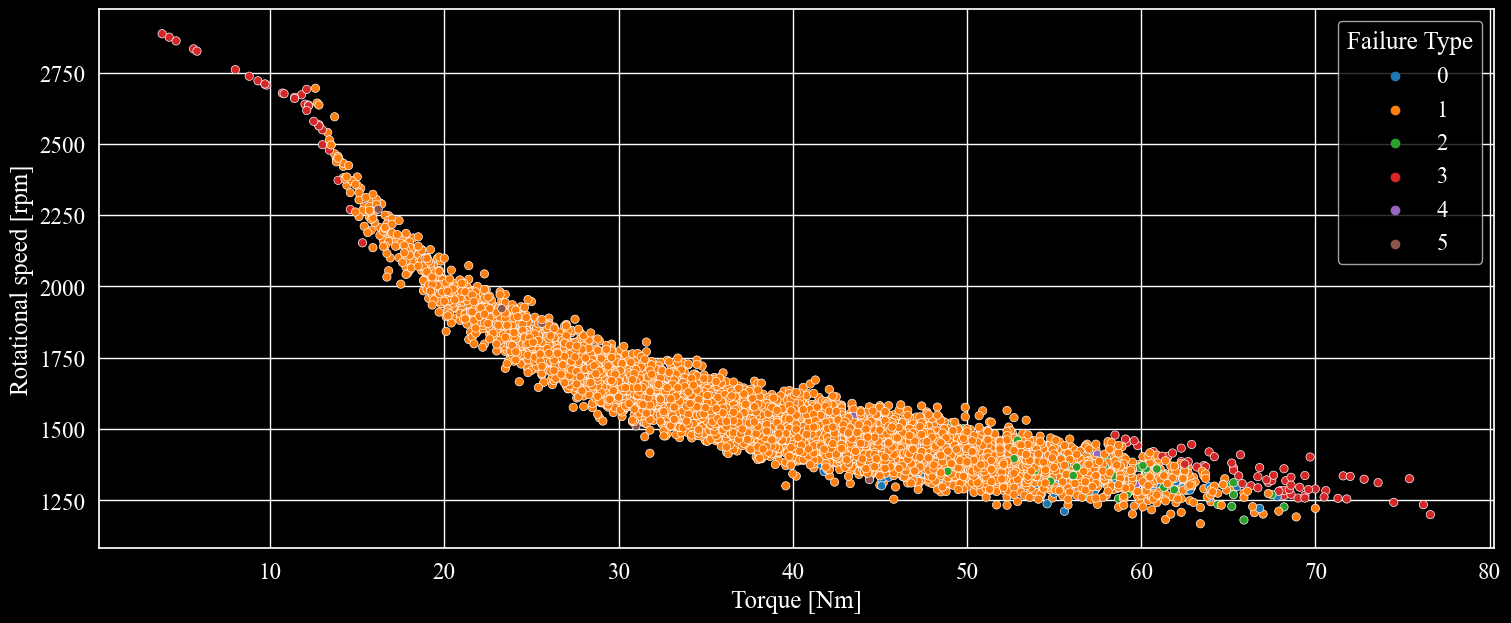

In [34]:
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10");

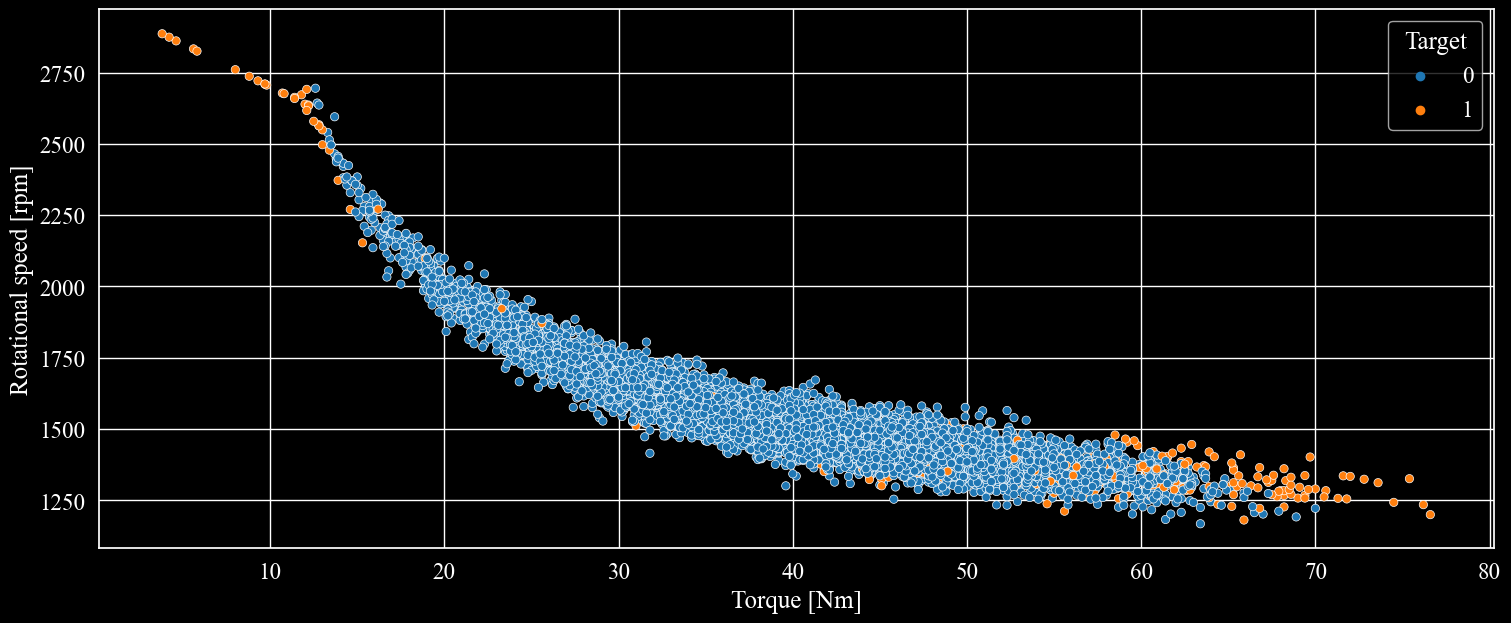

In [35]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

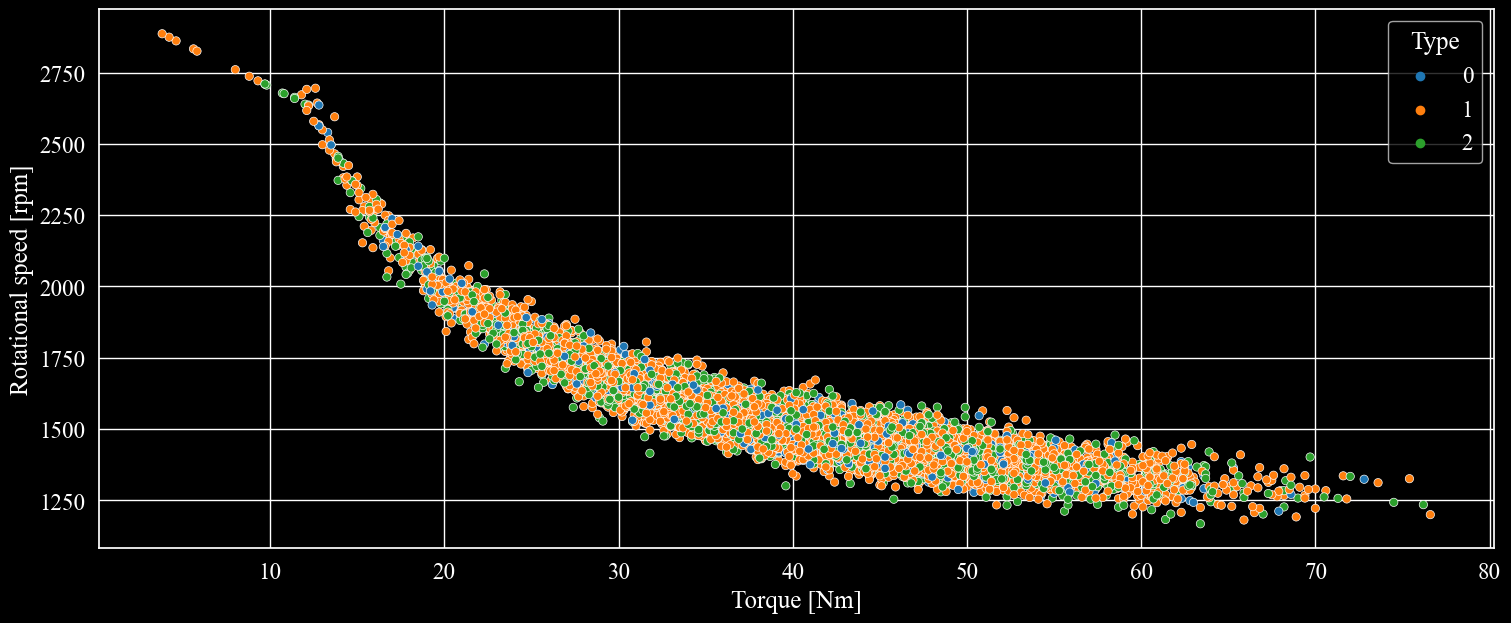

In [36]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

### Using Distplots to plot Kernel Density Estimates (KDE)

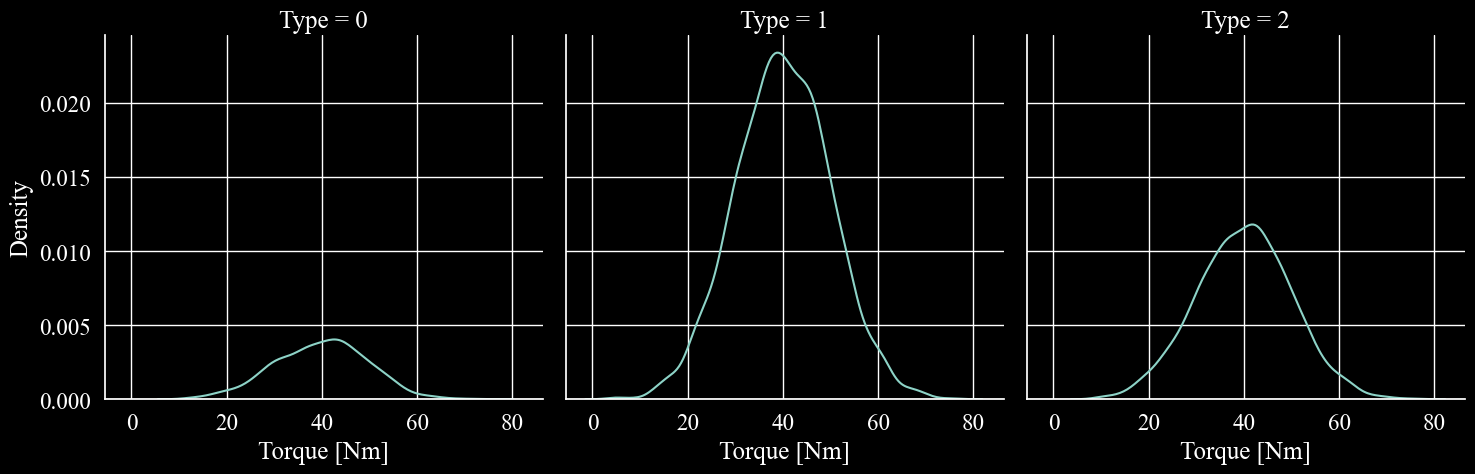

In [37]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde")

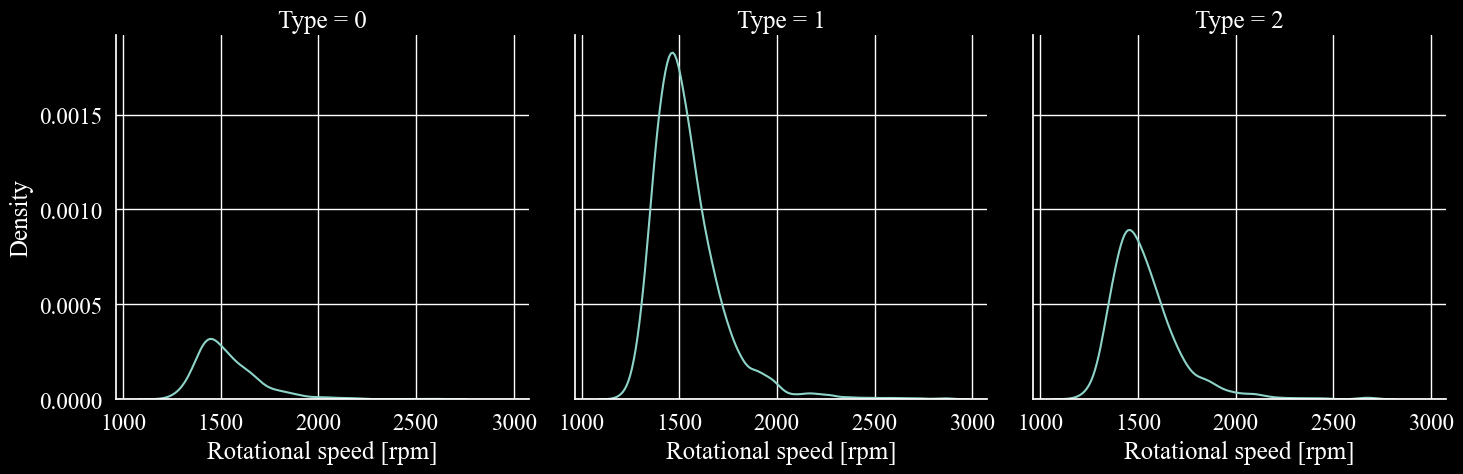

In [38]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

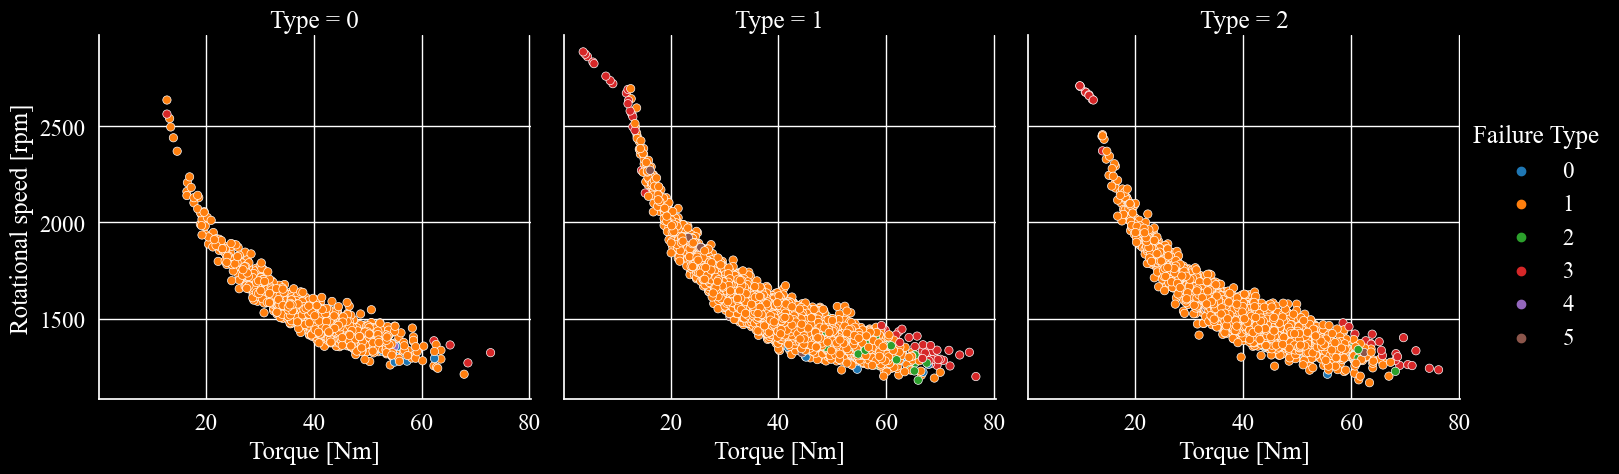

In [39]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

# Splitting Training and Test Data

In [40]:
from sklearn.preprocessing import LabelEncoder

# 
scaler = LabelEncoder()
scalar2 = LabelEncoder()

# Transformong  data (converting categorical to numerical)
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])
df['Type'] = scalar2.fit_transform(df['Type'])
df


,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,M14860,2,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,L47181,1,26.05,36.55,1408,46.3,3,0,1,10.5
2,3,L47182,1,25.95,36.35,1498,49.4,5,0,1,10.4
3,4,L47183,1,26.05,36.45,1433,39.5,7,0,1,10.4
4,5,L47184,1,26.05,36.55,1408,40.0,9,0,1,10.5
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,26.65,36.25,1604,29.5,14,0,1,9.6
9996,9997,H39410,0,26.75,36.25,1632,31.8,17,0,1,9.5
9997,9998,M24857,2,26.85,36.45,1645,33.4,22,0,1,9.6
9998,9999,H39412,0,26.85,36.55,1408,48.5,25,0,1,9.7


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
 
X = df.drop(columns = "Failure Type", axis=1)  
Y = df["Failure Type"]

columns_to_drop = ['UDI','Product ID']

X=X.drop(columns=columns_to_drop, axis=1 )
Y=Y.drop(columns=columns_to_drop, axis=1 )

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Logistic Regression

Training Accuracy    : 96.54 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.29      0.15      0.20        13
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.21      0.19      0.20      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


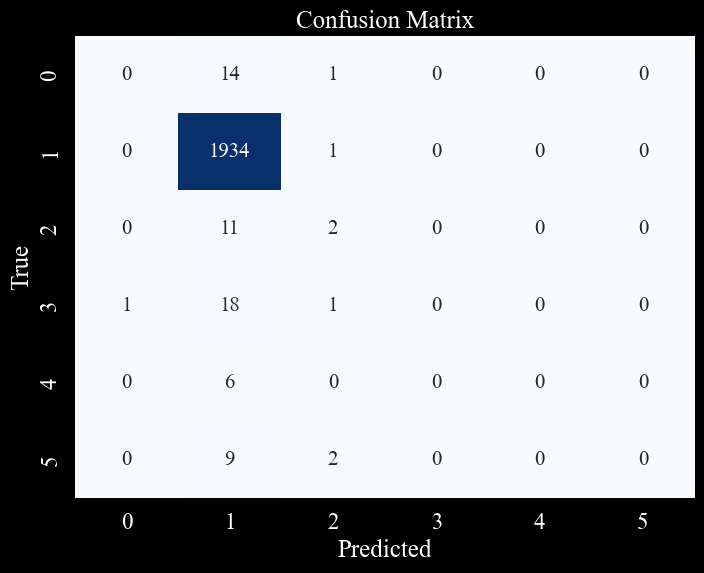

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and constructing a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction on test set
y_pred_lr = logreg.predict(X_test)

# Calculation of accuracy indicators and output of results
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Construction of matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.95 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.99      1.00      1935
           2       0.80      0.92      0.86        13
           3       0.95      0.90      0.92        20
           4       0.00      0.00      0.00         6
           5       1.00      0.82      0.90        11

    accuracy                           0.99      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


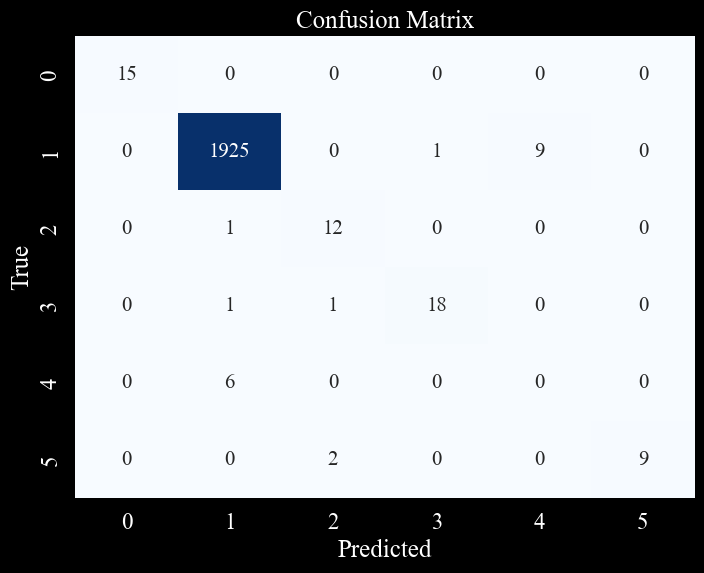

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and constructing a Decision Tree Classifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

# Prediction on test set
y_pred_dec = decision.predict(X_test)

# Calculation of accuracy indicators and output of results
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Construction of matrix
cm = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.45 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      1.00      1.00      1935
           2       0.87      1.00      0.93        13
           3       1.00      0.85      0.92        20
           4       0.00      0.00      0.00         6
           5       1.00      0.91      0.95        11

    accuracy                           0.99      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


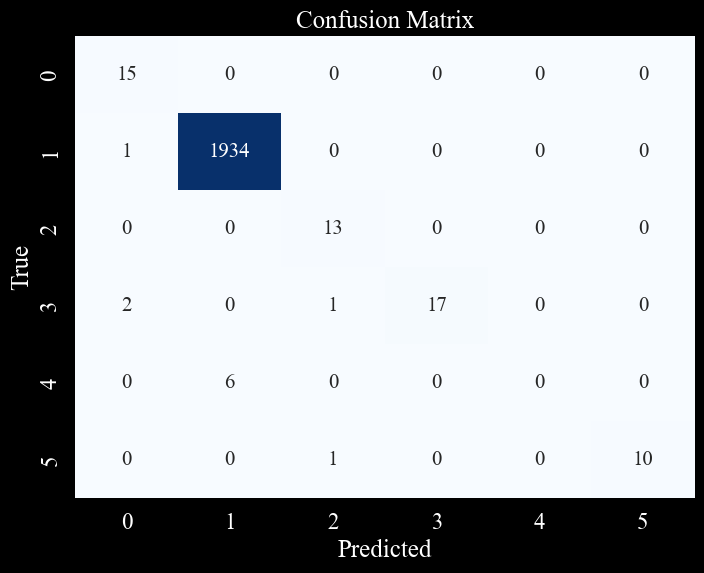

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and constructing a Random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Prediction on test set
y_pred_rf = random_forest.predict(X_test)

# Calculation of accuracy indicators and output of results
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Construction of matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SVM

Training Accuracy    : 96.51 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.00      0.00      0.00        13
           3       1.00      0.05      0.10        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.33      0.18      0.18      2000
weighted avg       0.95      0.97      0.95      2000

--------------------------------------------------------


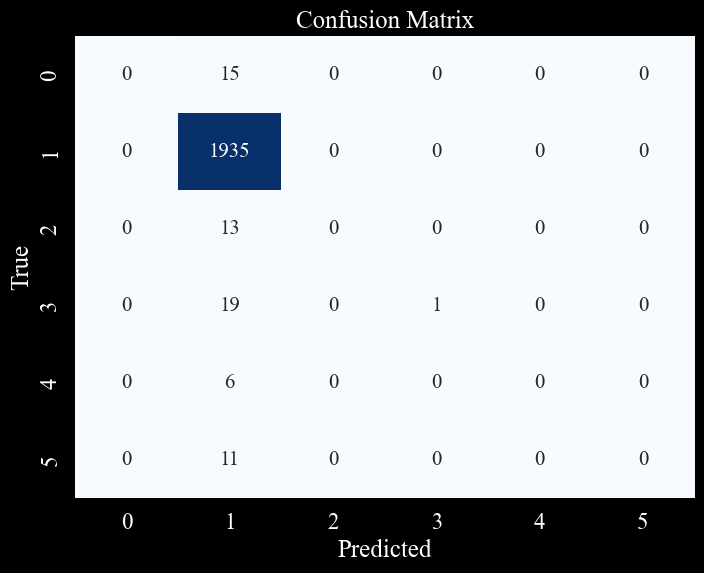

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and constructing a SVM
svc = SVC()
svc.fit(X_train, y_train)

# Prediction on test set
y_pred_svc = svc.predict(X_test)

# Calculation of accuracy indicators and output of results
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Construction of matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
import pandas as pd

# Assuming you have these variables from your model training
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
training_accuracies = [log_train, decision_train, random_forest_train, svc_train]
testing_accuracies = [log_accuracy, decision_accuracy, random_forest_accuracy, svc_accuracy]

# Creating a DataFrame with model training results
models = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': training_accuracies,
    'Testing Accuracy': testing_accuracies
})

# Sorting the DataFrame in descending order based on Testing Accuracy
sorted_models = models.sort_values(by='Testing Accuracy', ascending=False)

# Display the sorted DataFrame
print(sorted_models)

                 Model  Training Accuracy  Testing Accuracy
2        Random Forest             100.00             99.45
1        Decision Tree             100.00             98.95
0  Logistic Regression              96.54             96.80
3                  SVM              96.51             96.80


In [47]:
X_new= X_test

# Obtain predictions using the trained Random Forest model
predictions = random_forest.predict(X_new)

# Display the predictions
print("Predictions:", predictions)

Predictions: [1 0 1 ... 1 3 1]


In [48]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

# Assuming you have X_train, X_test, Y_train, Y_test defined

# Create and train a Random Forest model (you may already have this step)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Obtain predictions using cross-validation
y_pred_cv = cross_val_predict(random_forest, X_test, y_test, cv=5)

# Create a DataFrame with actual and predicted values
cv_results = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Class': y_pred_cv
})

# Add a title
title = "Cross-Validated Actual vs Predicted Classes"

# Convert the DataFrame to a formatted table using tabulate
table_text = tabulate(cv_results, headers='keys', tablefmt='fancy_grid', showindex=False)

# Display the formatted table with a title
print(f"\033[1m{title}\033[0m")
print(table_text)

Cross-Validated Actual vs Predicted Classes
╒════════════════╤═══════════════════╕
│   Actual Class │   Predicted Class │
╞════════════════╪═══════════════════╡
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 0 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              5 │                 2 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼───────────────────┤
│              1 │                 1 │
├────────────────┼──